<a href="https://colab.research.google.com/github/AnkitaSinha98/DeepLearningProgram/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]
single_image.shape

(28, 28)

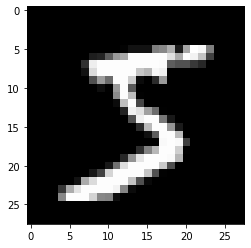

In [5]:
plt.set_cmap('gray')
plt.imshow(single_image)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
scaled_image = x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

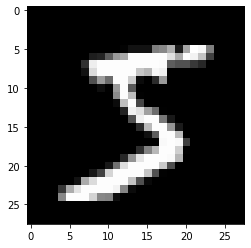

In [10]:
plt.imshow(scaled_image)

In [11]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1 )

In [16]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2798 - accuracy: 0.9169 - val_loss: 0.0502 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0435 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0417 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0395 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0406 - val_accuracy: 0.9875


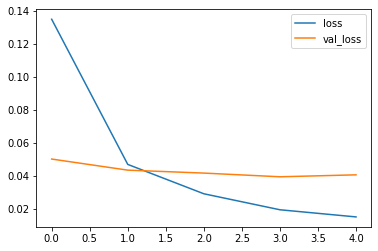

In [17]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

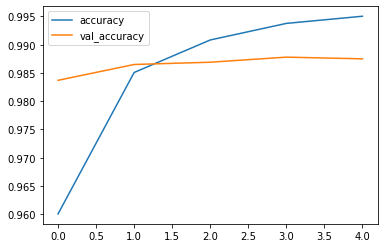

In [18]:
metrics[['accuracy', 'val_accuracy']].plot()

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)
predictions


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



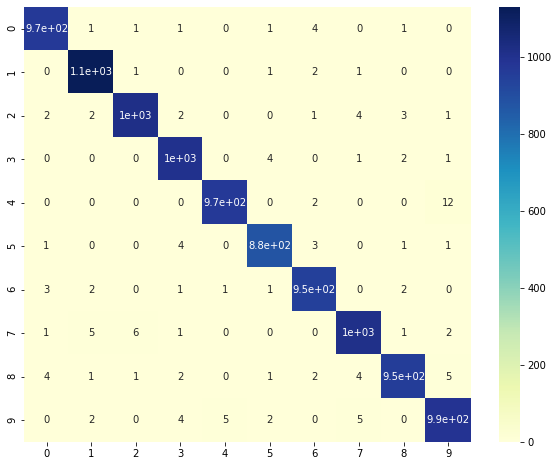

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='YlGnBu')

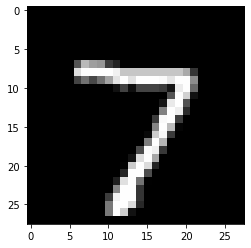

In [23]:
new_number = x_test[0]
plt.imshow(new_number.reshape(28,28))

In [24]:
new_number.shape

(28, 28, 1)

In [25]:
model.predict_classes(new_number.reshape(1, 28, 28, 1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])